In [1]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [2]:
import pandas as pd

In [97]:
data = pd.read_csv("diabetes.csv")

In [98]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##**Processing the data**

In [101]:
x = data.iloc[:,:-1].values

In [102]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [103]:
y  = data.iloc[:,-1:].values

In [104]:
# scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [105]:
x = scaler.fit_transform(x)

In [106]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [107]:
x.shape, y.shape

((768, 8), (768, 1))

In [108]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

In [109]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614, 1), (154, 8), (154, 1))

In [129]:
# building the model

import tensorflow as tf

from tensorflow.keras import layers

inputs = layers.Input(shape= (8,))

x = layers.Dense(400, activation= "relu")(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(400, activation= "relu")(x) 
x = layers.Dropout(0.2)(x)
x = layers.Dense(400, activation= "relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(500, activation= "relu")(x)
x = layers.Dropout(0.2)(x)


outputs = layers.Dense(1, activation= "sigmoid")(x)

model = tf.keras.Model(inputs, outputs)


# compiling the model

model.compile(
    loss= tf.keras.losses.binary_crossentropy,
    optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
)

# fitting the model

model_hist = model.fit(x_train,y_train,
                       epochs = 10,
                       validation_data = (x_test, y_test)
                       )


Epoch 1/10
20/20 [==============================] - 1s 15ms/step - loss: 0.5890 - accuracy: 0.6808 - val_loss: 0.5253 - val_accuracy: 0.7208
Epoch 2/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4710 - accuracy: 0.7769 - val_loss: 0.5176 - val_accuracy: 0.7597
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4530 - accuracy: 0.7752 - val_loss: 0.5251 - val_accuracy: 0.7727
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4446 - accuracy: 0.7850 - val_loss: 0.5395 - val_accuracy: 0.7727
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4452 - accuracy: 0.7769 - val_loss: 0.5307 - val_accuracy: 0.7532
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4236 - accuracy: 0.7964 - val_loss: 0.5798 - val_accuracy: 0.7078
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4194 - accuracy: 0.8029 - val_loss: 0.5549 - val_accuracy: 0.7468
Epoch 8/10
20/20 [=

In [130]:
model_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

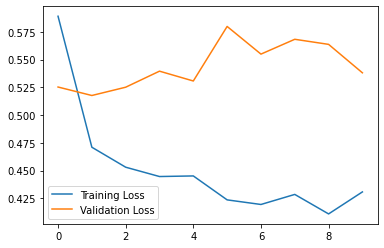

In [131]:
# plotting training loss and validation loss
import matplotlib.pyplot as plt

plt.plot(model_hist.history["loss"])
plt.plot(model_hist.history["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])

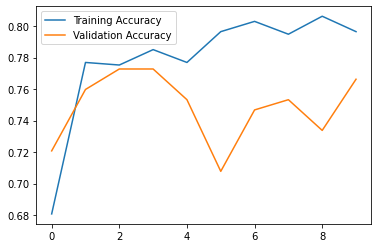

In [132]:
# plotting training and validation accuracy

plt.plot(model_hist.history["accuracy"])
plt.plot(model_hist.history["val_accuracy"])
plt.legend(["Training Accuracy", "Validation Accuracy"])

In [133]:
model_evaluation = model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.5381 - accuracy: 0.7662


In [134]:
y_predict = model.predict(x_test)

In [135]:
y_test_pred =tf.squeeze(tf.round(y_predict))

y_test_pred

<tf.Tensor: shape=(154,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)>

In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.77      0.91      0.83        99
           1       0.76      0.51      0.61        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



In [137]:
print(f"Model Accuracy: {model_evaluation[1] *100 :0.2f}%")

Model Accuracy: 76.62%
